<a href="https://colab.research.google.com/github/OskarKrafft/Machine-Learning-Project/blob/main/02_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the clean data**

In [2]:
# Mounting to Google Drive

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab Notebooks/Machine-Learning-Project

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Machine-Learning-Project


In [39]:
# Importing the data

import pandas as pd
eppes_clean = pd.read_csv('eppes_clean_categorical.csv')
eppes_clean = eppes_clean.drop(eppes_clean.columns[0], axis = 1)
eppes_clean

,q1.1,q1.2,q1.3,q1.4,q1.5,q1.6,q1.7,q1.8,q1.9,q1.10,...,d43a,d43b,d46.8,d60,d62_1,d62_2,d63,d72_1,d72_2,d77
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,1.0,3.0,6.0,1.0,3.0,3.0,2.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,3.0,2.0,6.0,3.0,2.0,2.0,3.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,1.0,1.0,1.0,5.0,2.0,2.0,2.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,2.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,1.0,1.0,1.0,1.0,5.0,2.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0
27460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0
27461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,3.0,6.0,6.0,3.0,4.0,2.0,2.0
27462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,2.0,6.0,6.0,4.0,2.0,2.0,2.0


In [40]:
# For test purposes: reduce to first 500 rows

eppes_clean = eppes_clean[:5000]
len(eppes_clean)

# Examining data types 
eppes_clean.dtypes.value_counts() # only floats - fix

float64    291
dtype: int64

**Defining train and test data**

In [41]:
# Define X and y

print(eppes_clean.head())

X = eppes_clean.drop(columns='qg1') # reference variable which contains voted y/n
y = eppes_clean['qg1'] # reference variable which contains voted y/n

# 80/20 train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=123)

   q1.1  q1.2  q1.3  q1.4  q1.5  q1.6  q1.7  q1.8  q1.9  q1.10  ...  d43a  \
0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   2.0   
1   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   2.0   
2   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   2.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   1.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0  ...   2.0   

   d43b  d46.8  d60  d62_1  d62_2  d63  d72_1  d72_2  d77  
0   1.0    1.0  1.0    3.0    6.0  1.0    3.0    3.0  2.0  
1   1.0    1.0  3.0    2.0    6.0  3.0    2.0    2.0  3.0  
2   2.0    1.0  1.0    1.0    5.0  2.0    2.0    2.0  1.0  
3   1.0    1.0  2.0    1.0    1.0  3.0    2.0    2.0  1.0  
4   1.0    1.0  1.0    1.0    5.0  2.0    2.0    2.0  3.0  

[5 rows x 291 columns]


In [29]:
X_train
y_train

y_train.value_counts(normalize=True)
print(X_train)

     q1.1  q1.2  q1.3  q1.4  q1.5  q1.6  q1.7  q1.8  q1.9  q1.10  ...  d43a  \
199   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   1.0   
450   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   2.0   
231   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   2.0   
95    1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   1.0   
54    1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   2.0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   ...   
98    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    1.0  ...   2.0   
476   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   2.0   
322   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   1.0   
382   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   2.0   
365   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   1.0   

     d43b  d46.8  d60  d62_1  d62_2  d63  d72_1  d7

**Defining pre-processing steps** 

All categorical variables are OneHotEncoded. Age is the only truly continuous variable in our dataset, which is already normally distributed and positive. Thus, we do not employ any transformation of the numerical variables. 

In [42]:
# Setting up pre-processing pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

# Identify all categorical variables by data type
categorical_X_features = X_train.select_dtypes(include=['object', 'bool']).columns

# OneHotEncode all categorical variables
categorical_transformer = OneHotEncoder(handle_unknown="error")

preprocessor = ColumnTransformer(remainder = 'passthrough', # remainder = passthrough for numerical variables to be kept unchanged
    transformers=[
        ("cat", categorical_transformer, categorical_X_features)]
)

In [43]:
# Inspect the number of variables after pre-processing

# Fit the pipeline to the training data
preprocessor.fit(X_train)
X_train_ = preprocessor.transform(X_train)

X_train_df = pd.DataFrame(data=X_train_)
X_train_df

,0,1,2,3,4,5,6,7,8,9,...,280,281,282,283,284,285,286,287,288,289
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,3.0,3.0,7.0,1.0,2.0,1.0,3.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,3.0,1.0,7.0,2.0,2.0,2.0,2.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,3.0,1.0,1.0,3.0,2.0,2.0,3.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,3.0,1.0,6.0,3.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,3.0,7.0,7.0,3.0,2.0,1.0,3.0
3996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,2.0,2.0,6.0,2.0,4.0,4.0,4.0
3997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,3.0,1.0,1.0,3.0,2.0,1.0,2.0
3998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,2.0,1.0,6.0,3.0,2.0,2.0,2.0


**Model 1 (Baseline): Logistic Regression**

In [44]:
# Define a logistic regression model

logistic_regression_pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

In [45]:
# Tune the hyperparameters

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

# define parameters to be optimised, based on handbook and different online articles
solvers = ['newton-cg', 'lbfgs', 'liblinear'] # algorithms used to solve the optimization problem
penalty = ['l2'] # specifying penaltty - limited to l2 as other penalties not compatible with all solvers
c_values = [0.01, 0.1, 1.0, 10, 100] # inverse of regularization strength (smaller values = stronger regularization)

# fit model
param_grid = {
    'classifier__solver':solvers, 
    'classifier__penalty':penalty,
    'classifier__C':c_values}

# Set-up repeated stratified cross-validation 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)

# Define GridSearchCV with F1 as comparison metrics
grid_search = GridSearchCV(estimator=logistic_regression_pipe, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1')

# Fit the grid search model
grid_result = grid_search.fit(X_train, y_train)

# print the mean test scrore (currently accuracy), sd and the params that were used
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.903486 using {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
0.890228 (0.010019) with: {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'}
0.889553 (0.009687) with: {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
0.889569 (0.009828) with: {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
0.903259 (0.009322) with: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'}
0.903119 (0.007908) with: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
0.903486 (0.008303) with: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
0.901193 (0.008902) with: {'classifier__C': 1.0, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'}
0.903351 (0.007684) with: {'classifier__C': 1.0, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs

In [46]:
# document best params as vector
from joblib import dump, load

estimator = grid_result.best_estimator_
dump(estimator, "best-logistic-regression.joblib")

['best-logistic-regression.joblib']

In [47]:
# get classification report on best performing model
from sklearn.metrics import classification_report

best_logistic_regression = load("best-logistic-regression.joblib")
best_logistic_regression.fit(X_train, y_train)

y_pred_logistic = best_logistic_regression.predict(X_train)

print(y_pred_logistic)

print(classification_report(y_train, y_pred_logistic)) 

visualizer = ClassificationReport(best_logistic_regression, classes=[1.0, 2.0])
visualizer.fit(X_train, y_train)  
visualizer.score(X_train, y_train)
visualizer.poof()


[1. 1. 1. ... 1. 2. 2.]
              precision    recall  f1-score   support

         1.0       0.89      0.94      0.92      2672
         2.0       0.87      0.77      0.82      1328

    accuracy                           0.88      4000
   macro avg       0.88      0.86      0.87      4000
weighted avg       0.88      0.88      0.88      4000



**Model 2: Naive Bayesian**

In [48]:
### Define transformers

# numeric_transformer = MinMaxScaler() # no transformation for numeric data
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(remainder = 'passthrough', # passthrough so numeric columns are not dropped
    transformers=[("cat", categorical_transformer, categorical_X_features)])

In [49]:
# CategoricalNB seems most suitable as it assumes categorical distribution (there seems not explicit solution for ordinal features). 
# Alternatives are less relevant, e.g. Gaussian NB is for continuous and Bernoulli for binary

from sklearn.naive_bayes import CategoricalNB

### Set up the pipeline
naive_bayes_pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", CategoricalNB())]
)

In [50]:
### Fit and predict the model

naive_bayes_pipe.fit(X_train, y_train)
y_pred_bayes = naive_bayes_pipe.predict(X_train)

In [51]:
### Assess the model performance

# print classificarion statistics
print(classification_report(y_train, y_pred_bayes)) 

### Examine frequencies in y (predicted and actual training y)
y_pred_df = pd.DataFrame(y_pred_bayes)
print("Frequency in y train:", "\n", y_train.value_counts(normalize=True), "\n")
print("Frequency in naive bayes prediction:", "\n",y_pred_df.value_counts(normalize=True))

              precision    recall  f1-score   support

         1.0       0.81      0.76      0.79      2672
         2.0       0.57      0.64      0.61      1328

    accuracy                           0.72      4000
   macro avg       0.69      0.70      0.70      4000
weighted avg       0.73      0.72      0.73      4000

Frequency in y train: 
 1.0    0.668
2.0    0.332
Name: qg1, dtype: float64 

Frequency in naive bayes prediction: 
 1.0    0.6265
2.0    0.3735
dtype: float64


**Model 3: SVM**

In [52]:
### Define transformers

# numeric_transformer = MinMaxScaler() # no transformation for numeric data
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(remainder = 'passthrough', # passthrough so numeric columns are not dropped
    transformers=[("cat", categorical_transformer, categorical_X_features)])

In [53]:
from sklearn.svm import SVC

### Set up the pipeline
SVM_pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", SVC())]
)

In [55]:
# define parameters
kernel = ['rbf'] # specifies the kernel type to be used in the algorithm
c_values = [0.1, 1.0, 10, 100] # inverse of regularization strength (smaller values = stronger regularization)
gamma_values = [1, 0.1, 0.01, 0.001]

# set up param grid for GridSearch
param_grid = {
    'classifier__kernel':kernel, 
    'classifier__C':c_values,
    'classifier__gamma':gamma_values}

# set up GridSearch
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=123)
grid_search = GridSearchCV(estimator=SVM_pipe, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1')

# fit the grid search model
grid_result = grid_search.fit(X_train, y_train)

# print the mean test scrore (currently accuracy), sd and the params that were used
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.901682 using {'classifier__C': 10, 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'}
0.800959 (0.000440) with: {'classifier__C': 0.1, 'classifier__gamma': 1, 'classifier__kernel': 'rbf'}
0.800959 (0.000440) with: {'classifier__C': 0.1, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}
0.800959 (0.000440) with: {'classifier__C': 0.1, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}
0.828883 (0.004667) with: {'classifier__C': 0.1, 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'}
0.800959 (0.000440) with: {'classifier__C': 1.0, 'classifier__gamma': 1, 'classifier__kernel': 'rbf'}
0.800959 (0.000440) with: {'classifier__C': 1.0, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}
0.846593 (0.006021) with: {'classifier__C': 1.0, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}
0.858010 (0.005822) with: {'classifier__C': 1.0, 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'}
0.800959 (0.000440) with: {'classifier__C': 10, 'classifier__gamma

In [20]:
# document best params as vector
estimator = grid_result.best_estimator_
dump(estimator, "best-SVM.joblib")

['best-SVM.joblib']

**Model 4: Random Forest**

In [21]:
# get classification report on best performing model
best_SVM = load("best-SVM.joblib")
best_SVM.fit(X_train, y_train)

y_pred_SVM = best_SVM.predict(X_train)

print(y_pred_SVM)
print(classification_report(y_train, y_pred_SVM)) 

[1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1.
 1. 2. 1. 2. 2. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1.

In [ ]:
### Define transformers

# numeric_transformer = MinMaxScaler() # no transformation for numeric data
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(remainder = 'passthrough', # passthrough so numeric columns are not dropped
    transformers=[("cat", categorical_transformer, categorical_X_features)])

In [36]:
from sklearn.ensemble import RandomForestClassifier

### Set up the pipeline
random_forest_pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier(random_state = 123))])

In [ ]:
# define parameters
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 5, 10] # minimum sample number to split a node
min_samples_leaf = [1, 2, 4] # minimum sample number that can be stored in a leaf node

# set up param grid for GridSearch
random_grid = {
    'classifier__n_estimators':n_estimators, 
    'classifier__max_features':max_features,
    'classifier__max_depth':max_depth,
    'classifier__min_samples_split':min_samples_split,
    'classifier__min_samples_leaf': min_samples_leaf}

# set up GridSearch
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=123)
RandomizedSearchCV(estimator = random_forest_pipe , param_distributions = random_grid, cv = cv, random_state=123, n_jobs = -1)

# fit the grid search model
grid_result = grid_search.fit(X_train, y_train)

# print the mean test scrore (currently accuracy), sd and the params that were used
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [36]:
### Comparing the best performing models

from sklearn.model_selection import KFold, cross_val_score

models = []
models.append(('Logistic Regression', load("best-logistic-regression.joblib")))
models.append(('Naive Bayes', naive_bayes_pipe))
models.append(('SVM', load("best-SVM.joblib")))

print(models)

y_train.value_counts(normalize=True)

[('Logistic Regression', Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  Index([], dtype='object'))])),
                ('classifier', LogisticRegression(C=0.1, solver='newton-cg'))])), ('Naive Bayes', Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('classifier', CategoricalNB())])), ('SVM', Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
        

1.0    0.83
2.0    0.17
Name: qg1, dtype: float64

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


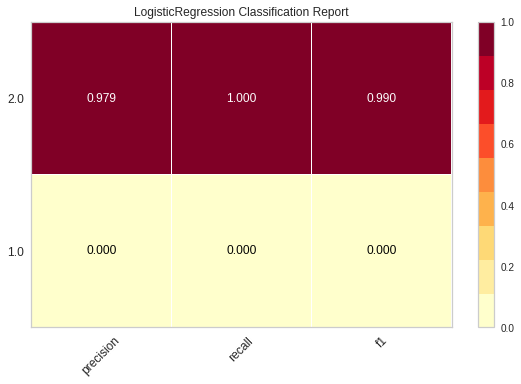

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


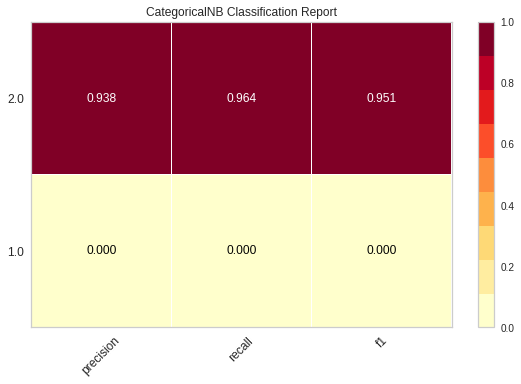

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


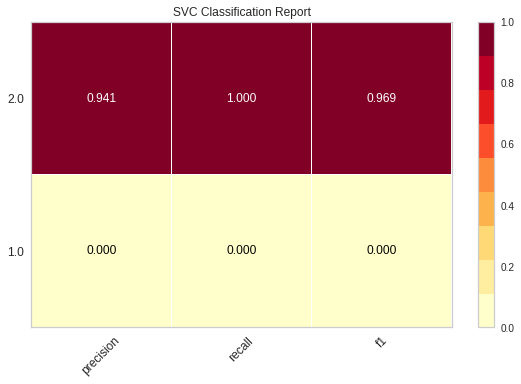

<bound method IndexOpsMixin.value_counts of 199    1.0
450    1.0
231    1.0
95     1.0
54     2.0
      ... 
98     2.0
476    1.0
322    2.0
382    2.0
365    1.0
Name: qg1, Length: 400, dtype: float64>

In [37]:
from yellowbrick.classifier import ClassificationReport

for name, model in models:
  visualizer = ClassificationReport(model, classes=[1.0, 2.0])
  visualizer.fit(X_train, y_train)  
  visualizer.score(X_train, y_train)
  visualizer.poof()


y_train.value_counts

In [29]:
results = []
names = []
scoring = 'accuracy'

for name, model in models:
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
  cv_results = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())


print(cv_results.mean())


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: se

0.8699999999999999
